<a href="https://colab.research.google.com/github/rgabhane94/Netflix.py/blob/main/Netflix_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Note: The PDF may not contain the full results. Kindly refer to the Colab link for the complete output - https://colab.research.google.com/drive/11mOgP8RweqWif83TrUJZd_13XtyvbzGv?usp=sharing

### Problem Statement:What type of content (Movies/TV Shows, genres, languages) should Netflix focus on producing, and in which countries, to maximize growth?


###1. Import require libraies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

### 2. Loading the data

In [ ]:
df = pd.read_csv("netflix.csv")

###3. Basic Data Analysis

In [ ]:
## The shape of the data

df.shape

(8807, 12)

In [ ]:
## Top 5 records of my dataframe

df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Categorical Type
df['show_id'].dtype #String
df['type'].dtype #String
df['title'].dtype #String
df['director'].dtype #String
df['cast'].dtype #String
df['country'].dtype #String
df['date_added'].dtype #datetime
df['release_year'].dtype #Integer
df['rating'].dtype #String
df['duration'].dtype #String
df['listed_in'].dtype #String
df['description'].dtype #String

dtype('O')

In [ ]:
# Detect missing values in columns like director, cast, country.

In [ ]:
missing_director = df['director'].isnull()
missing_director.value_counts(normalize=True)*100

,proportion
director,
False,70.091972
True,29.908028


####Insight: Only 70% of director information is present in the dataset

In [ ]:
missing_cast = df["cast"].isnull()
missing_cast.value_counts(normalize=True)*100

,proportion
cast,
False,90.632451
True,9.367549


####Insight: More than 90% cast is information is present.

In [ ]:
missing_country = df["country"].isnull()
missing_country.value_counts(normalize=True)*100

,proportion
country,
False,90.564324
True,9.435676


####Insight: More than 90% country information is present.

In [ ]:
missing_ratings = df['rating'].isnull()
missing_ratings.value_counts(normalize=True)*100

,proportion
rating,
False,99.954582
True,0.045418


####Insight: There are less than 1% ratings missing

In [ ]:
missing_genre = df['genre'].isnull()
missing_genre.value_counts(normalize=True)*100

,proportion
genre,
False,100.0


####Insight: we have complete information of genre present

In [ ]:
# Basic descriptive statistics (mean, median release_year, unique genres, etc.).
# Count, frequency and unique values

##Recommendation and Insight

In [ ]:
df["type"].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [ ]:
##Univariate:

df["type"].value_counts(normalize=True)*100

,proportion
type,
Movie,69.615079
TV Show,30.384921


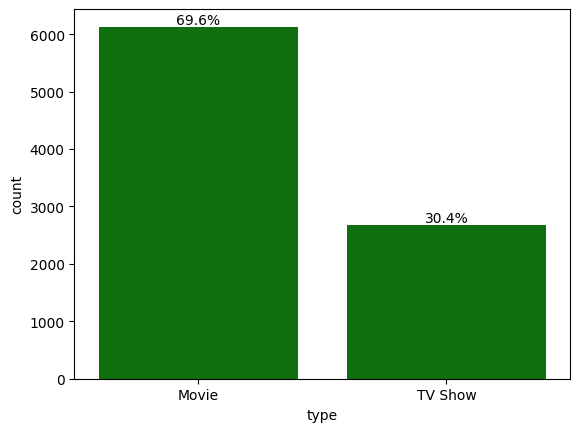

In [ ]:
ax = sns.countplot(x = df["type"],color = "green")

total = len(df)

# Loop through the bars and annotate with %
for p in ax.patches:
    count = p.get_height()               # Height of bar (count)
    percentage = f'{100 * count/total:.1f}%'  # Convert to %
    x = p.get_x() + p.get_width() / 2    # X-coordinate (center of bar)
    y = p.get_height()                   # Y-coordinate (top of bar)
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

###Insights : Movies are 69% of the totals collection whereas TV shows coresponds to 30%

<Axes: ylabel='year'>

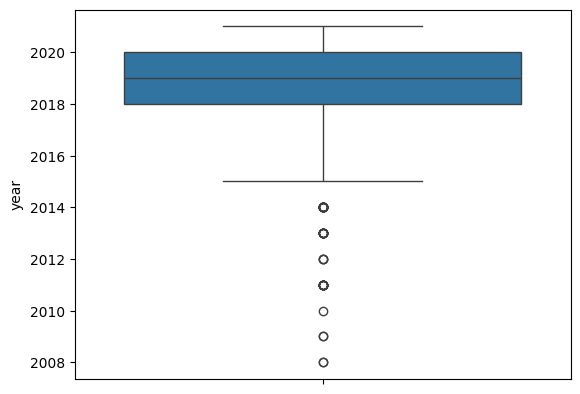

In [ ]:
sns.boxplot(df["year"])

####Insight: Netflix content was added between 2018 and 2020, with the peak around 2019–2020

####Released Year

<Axes: xlabel='release_year', ylabel='count'>

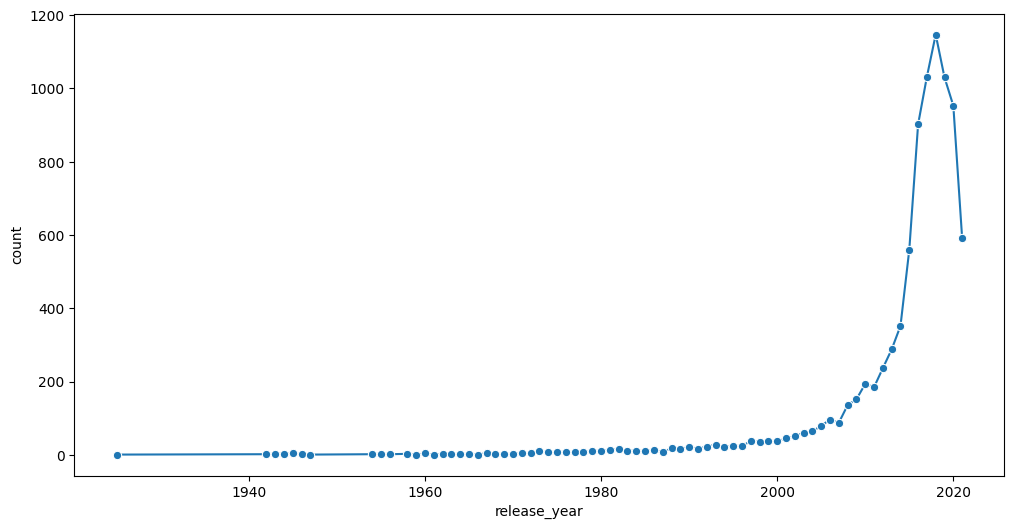

In [ ]:
released_year = df["release_year"].value_counts().reset_index()
released_year

plt.figure(figsize=(12,6))
sns.lineplot(x="release_year", y="count", data=released_year, marker="o")

####Insight: After 2010, there is a sharp exponential rise, with a huge spike around 2017–2019, showing the peak of Netflix’s global expansion and content production

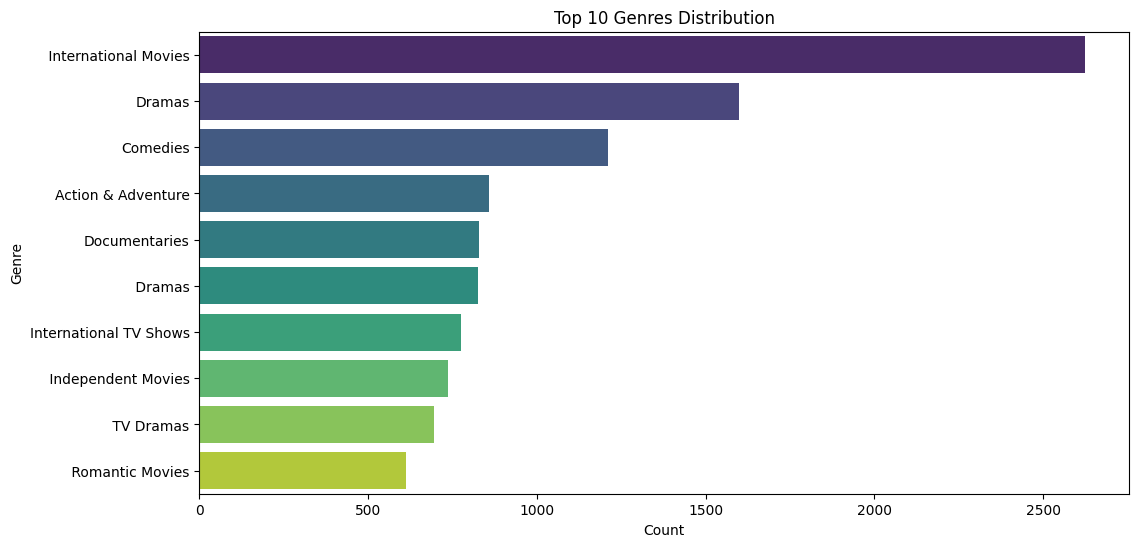

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="count", y="genre",hue = "genre",data=genre_df.head(10), palette="viridis")
plt.title("Top 10 Genres Distribution")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

####Insight:International and Dramas and Comedies indicates an attempt to appeal to both mass global audiences and diverse cultural preferences.  

In [ ]:
released_year_percent = df["release_year"].value_counts(normalize=True) * 100
print(released_year_percent)

release_year
2018    13.023731
2017    11.717952
2019    11.695242
2020    10.820938
2016    10.241853
          ...    
1961     0.011355
1925     0.011355
1959     0.011355
1966     0.011355
1947     0.011355
Name: proportion, Length: 74, dtype: float64


####Insight: Around 35% of movies were released between 2016 and 2018, while the span from 1947 to 1961 together contributes less than 1%

####Date_Added

In [ ]:
##Converting object type to date time format.

df["date_added"] = pd.to_datetime(df["date_added"], format = "mixed")

In [ ]:
df["year"] = df["date_added"].dt.year.astype("Int64") #converting float into int
df["month"] = df["date_added"].dt.month.astype("Int64")
df["day"] = df["date_added"].dt.day.astype("Int64")
df["day_of_the_week"] = df["date_added"].dt.day_of_week.astype("Int64")

<Axes: xlabel='day_of_the_week', ylabel='count'>

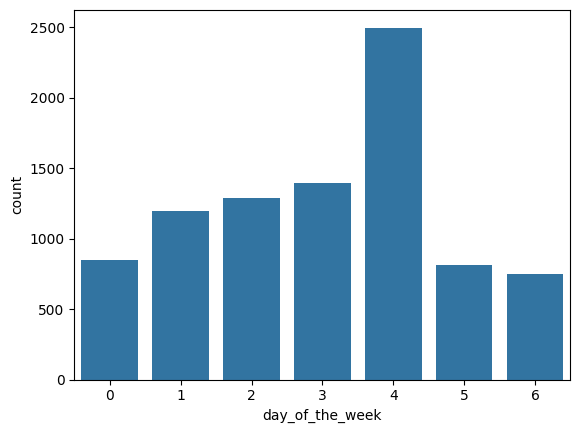

In [ ]:
sns.countplot(x = df["day_of_the_week"])

####Insight: The majority of movies and TV shows were added to the platform on Fridays (the 4th day of the week).

<Axes: xlabel='month', ylabel='count'>

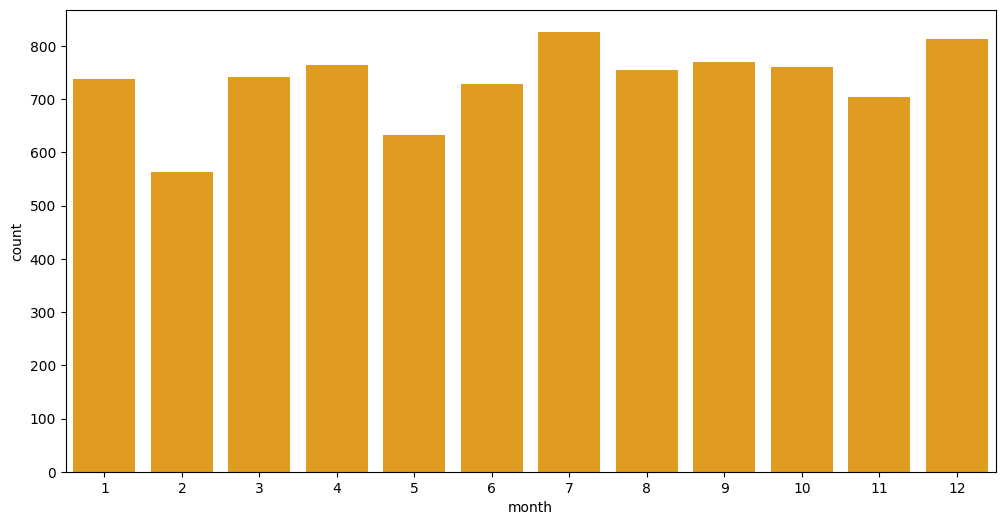

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = df["month"], color = 'Orange')

####Insight: The majority of movies and TV shows were added to the platform in July and December month.

####Listed_In

In [ ]:
df.rename(columns={"listed_in":"genre"},inplace = True)

In [ ]:
all_genre = []

for items in df['genre'].str.split(','):
  all_genre.extend(items)

pd.Series(all_genre).value_counts().reset_index()

genre_df = pd.Series(all_genre).value_counts().reset_index()

genre_df.columns = ['genre', 'count']

print(genre_df.head(10))

                    genre  count
0    International Movies   2624
1                  Dramas   1600
2                Comedies   1210
3      Action & Adventure    859
4           Documentaries    829
5                  Dramas    827
6  International TV Shows    774
7      Independent Movies    736
8               TV Dramas    696
9         Romantic Movies    613


####Insight: Drama remains the bread-and-butter genre, appealing to a wide age group and markets. Comedy also has a strong share — a relatively low-cost, high-consumption genre.

####Insigt:

####3.Non-Graphical Analysis

In [ ]:
## Break dataset into parts based on type using mask.

df["type"].value_counts() # Do the analysis seperately

,count
type,
Movie,6131
TV Show,2676


In [ ]:
# Movies vs. TV Shows across years (stacked bar chart).

In [ ]:
movies_tv_year  = df.groupby(["release_year","type"]).size().reset_index(name = "count")

In [ ]:
df['decade'] = (df['release_year'] // 10) * 10
df['decade'] = df['decade'].astype(str) + "s"

In [ ]:
movies_tv_decade = df.groupby(["decade", "type"]).size().reset_index(name="count")

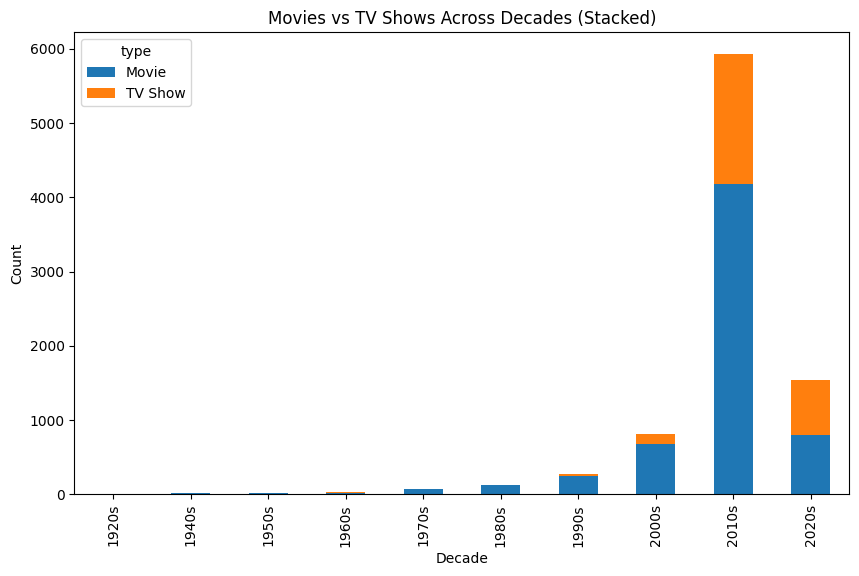

In [ ]:
movies_tv_pivot = movies_tv_decade.pivot(index="decade", columns="type", values="count").fillna(0)

movies_tv_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6)
)

plt.title("Movies vs TV Shows Across Decades (Stacked)")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.show()

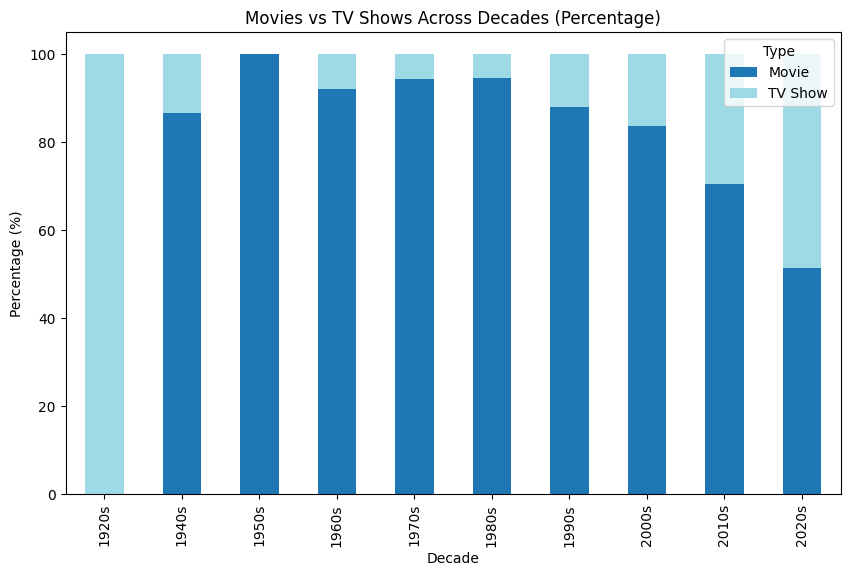

In [ ]:
decade_type = df.groupby(["decade", "type"]).size().unstack(fill_value=0)

# Convert to percentage
decade_type_percent = decade_type.div(decade_type.sum(axis=1), axis=0) * 100

# Plot percentage stacked bar chart
decade_type_percent.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")

plt.title("Movies vs TV Shows Across Decades (Percentage)")
plt.xlabel("Decade")
plt.ylabel("Percentage (%)")
plt.legend(title="Type")
plt.show()

####Insight: The popularity of TV shows began growing in the 1980s and continued to rise into the 2020s, showing a steady percentage increase.

In [ ]:
# Day of week vs. content launches → Which day Netflix prefers to release new content.

In [ ]:
day_distribution = df['day_of_the_week'].value_counts().reset_index()
day_distribution.columns = ['day_of_the_week', 'count']

print(day_distribution)

   day_of_the_week  count
0                4   2498
1                3   1396
2                2   1288
3                1   1197
4                0    851
5                5    816
6                6    751


<Axes: xlabel='day_of_the_week', ylabel='count'>

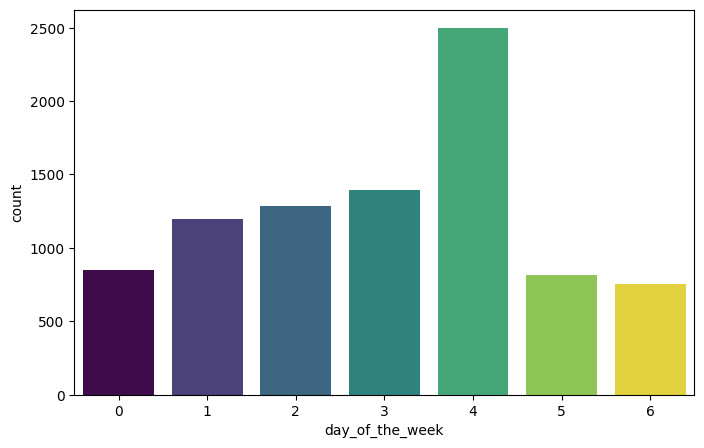

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='day_of_the_week',
    y='count',
    hue='day_of_the_week',  # set hue to same column
    data=day_distribution,
    palette="viridis",
    legend=False        # removes duplicate legend
)

In [ ]:
#Top content-producing countries.

Top_content_Producing = df['country'].value_counts(normalize=True).head(10) * 100
Top_content_Producing

,proportion
country,
United States,35.330993
India,12.186560
United Kingdom,5.253260
Japan,3.071715
South Korea,2.494985
Canada,2.269308
Spain,1.817954
France,1.554664
Mexico,1.379137


####Insight: Over one-third of all content comes from the U.S., making it Netflix’s largest content contributor. India contributes a significant 12%, reflecting Netflix’s investment in Bollywood and regional Indian cinema/TV.

In [ ]:
## Who is the popular director

In [ ]:
popular_director = df["director"].value_counts().head(10)
popular_director

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12


In [ ]:
#plt.figure(figsize=(12,6))
last_decade = df["year"]
last_decade
#sns.countplot(x="release_year", hue="type", data=df)

,year
0,2021
1,2021
2,2021
3,2021
4,2021
...,...
8802,2019
8803,2019
8804,2019
8805,2020


In [ ]:
# Missing Value & Outlier Check (10 points)

In [ ]:
# % missing directors, actors, country.

missing_director = df["director"].isnull().sum()
missing_director

np.int64(2634)

In [ ]:
# Outliers in release_year (e.g., 1925 vs. 2020).

missing_years = df['year'].isnull().sum()
missing_years

np.int64(10)

In [ ]:
# Duration inconsistencies (e.g., 2 seasons vs. minutes).

duration_inconsistency = df['duration'].value_counts()
duration_inconsistency

,count
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
90 min,152
97 min,146
...,...
228 min,1
18 min,1
205 min,1


In [ ]:
df["country"] = df["country"].fillna("Unknown")

# Group by country and type
country_content = (
    df.groupby(["country", "type"])
    .size()
    .unstack(fill_value=0)
    .sort_values(by=["Movie", "TV Show"], ascending=False)
)

print(country_content.head(15))

type                           Movie  TV Show
country                                      
United States                   2058      760
India                            893       79
Unknown                          440      391
United Kingdom                   206      213
Canada                           122       59
Spain                             97       48
Egypt                             92       14
Nigeria                           86        9
Indonesia                         77        2
Japan                             76      169
Turkey                            76       29
France                            75       49
Philippines                       73        2
Mexico                            70       40
United Kingdom, United States     63       12


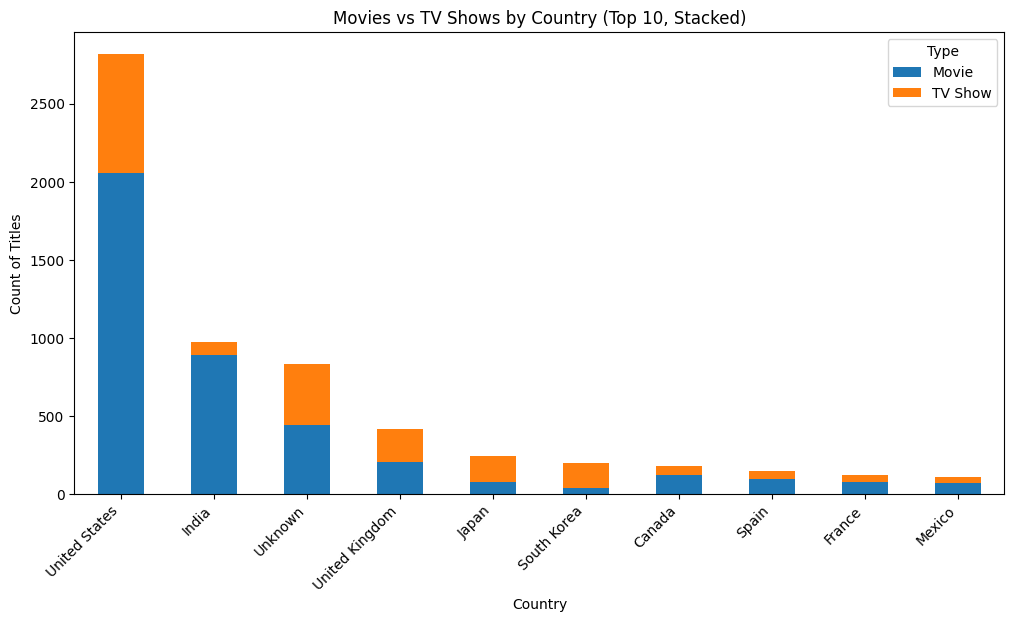

In [ ]:
top_countries = country_content.sum(axis=1).sort_values(ascending=False).head(10)
top_df = country_content.loc[top_countries.index]
top_df.plot(kind="bar", stacked=True, figsize=(12,6))

plt.title("Movies vs TV Shows by Country (Top 10, Stacked)")
plt.ylabel("Count of Titles")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Type")
plt.show()

####Insight: United States and India country have the highest volume of both movies and TV shows, indicating they are key markets for content production to maximize growth.


In [ ]:
# Year_on_Year_growth_US

In [ ]:
us_df = df[df['country'] == "United States"]

us_content = us_df.groupby(["release_year","type"]).size().unstack(fill_value=0)

us_growth = us_content.pct_change() * 100

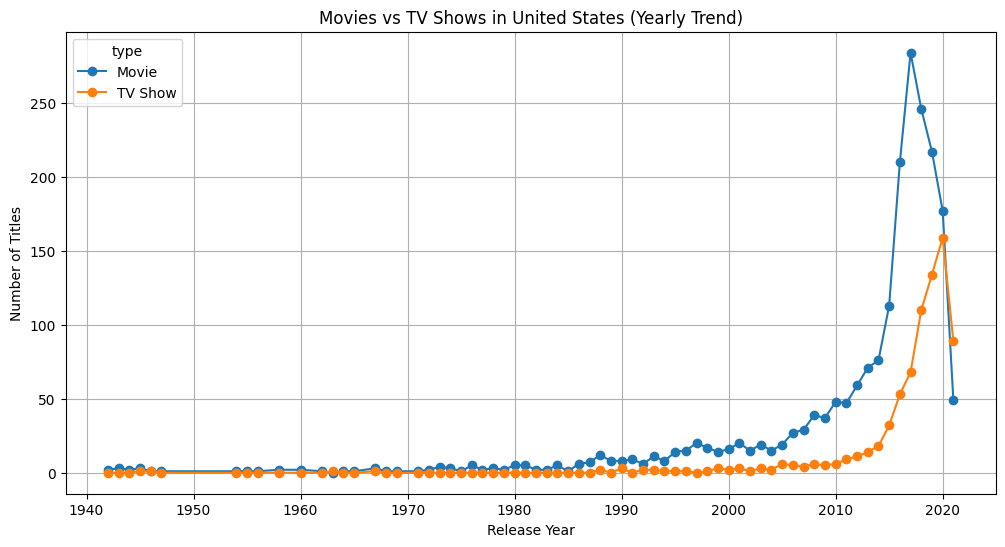

In [ ]:
us_content.plot(kind="line", marker="o", figsize=(12,6))

plt.title("Movies vs TV Shows in United States (Yearly Trend)")
plt.ylabel("Number of Titles")
plt.xlabel("Release Year")
plt.grid(True)
plt.show()

####Insight: Movies always had a higher volume than TV Shows, but TV Shows started catching up rapidly after 2015

In [ ]:
Ind_df = df[df['country'] == "India"]

Ind_content = Ind_df.groupby(["release_year","type"]).size().unstack(fill_value=0)

Ind_growth = Ind_content.pct_change() * 100

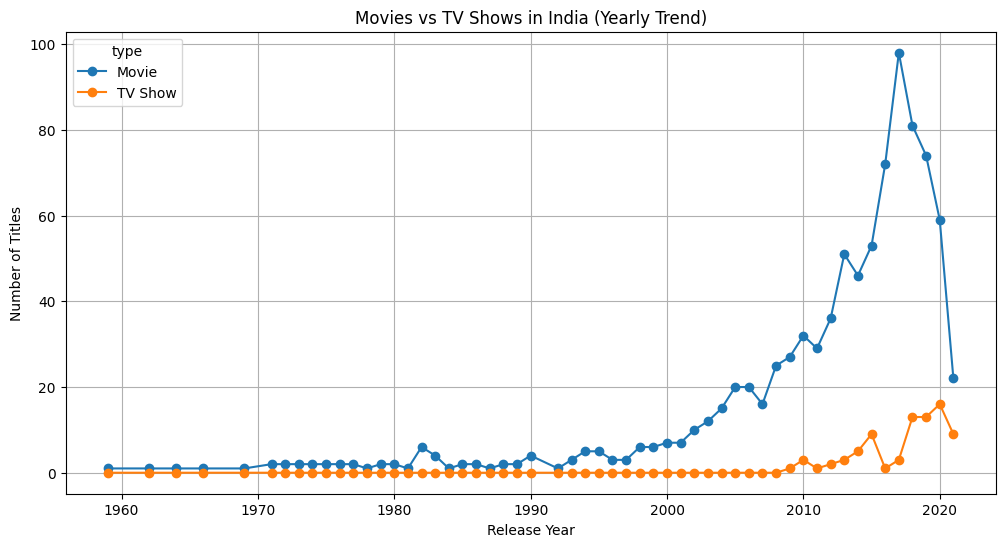

In [ ]:
Ind_content.plot(kind="line", marker="o", figsize=(12,6))

plt.title("Movies vs TV Shows in India (Yearly Trend)")
plt.ylabel("Number of Titles")
plt.xlabel("Release Year")
plt.grid(True)
plt.show()

####Insight: The production of both movies and TV shows in India has seen a significant increase over time, with a sharp acceleration starting around 2010. Movies have consistently dominated the content output in India, far outpacing the number of TV shows produced on a yearly basis

## Recommendations: Keep movies as the breadth strategy (mass production to attract diverse audiences).

## Double down on TV shows in high-growth regions (U.S., India, South Korea) to lock in retention and reduce churn.

## Prioritize Drama & Comedy as global staples.Invest heavily in regional storytelling (Indian Dramas, Korean Thrillers, Spanish-language telenovelas) that have strong global crossover potential.

## Explore genre fusion (e.g., comedy-dramas, thriller-dramas) to capture broader segments.

## Launch tentpole shows (big-budget originals) in December for holiday binge demand.

## Launch tentpole shows (big-budget originals) in December for holiday binge demand. Use July for blockbuster movies (aligning with global summer entertainment cycles).